In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel
df=pd.read_csv("/home/vanemtzl/Actividad 6/CaboAbril.csv")

In [2]:
df.columns

Index(['Año', 'Mes', 'Día', 'Hora(utc)', 'Altura(mm)'], dtype='object')

In [3]:
from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Año'],x[u'Mes'], x[u'Día'], x[u'Hora(utc)']), "%Y %m %d %H"),axis=1)

In [4]:
df.describe()

,Año,Mes,Día,Hora(utc),Altura(mm)
count,720.0,720.0,720.000000,720.000000,720.000000
mean,2016.0,4.0,15.500000,11.500000,494.248611
std,0.0,0.0,8.661458,6.926999,358.901660
min,2016.0,4.0,1.000000,0.000000,-391.000000
25%,2016.0,4.0,8.000000,5.750000,218.750000
50%,2016.0,4.0,15.500000,11.500000,524.000000
75%,2016.0,4.0,23.000000,17.250000,740.000000
max,2016.0,4.0,30.000000,23.000000,1340.000000


In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Año           0
Mes           0
Día           0
Hora(utc)     0
Altura(mm)    0
date          0
dtype: int64

In [6]:
df.tail()

,Año,Mes,Día,Hora(utc),Altura(mm),date
715,2016,4,30,19,297,2016-04-30 19:00:00
716,2016,4,30,20,409,2016-04-30 20:00:00
717,2016,4,30,21,524,2016-04-30 21:00:00
718,2016,4,30,22,624,2016-04-30 22:00:00
719,2016,4,30,23,692,2016-04-30 23:00:00


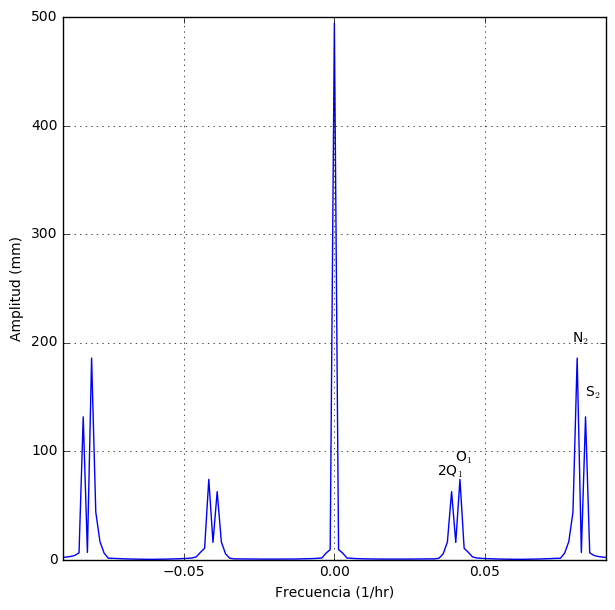

In [7]:
#Gráfica aproximando las frecuencias de los armónicos
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 720
# sample spacing
T = 1
x = df['date']
y = df['Altura(mm)']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(-0.09, 0.09)
fig=plt.gcf()
fig.set_size_inches(7,7)

plt.xlabel("Frecuencia (1/hr)")
plt.ylabel("Amplitud (mm)")

plt.text(.04,90,"O$_1$")
plt.text(.079,200,"N$_2$")
plt.text(.083,150,"S$_2$")
plt.text(.034,77,"2Q$_1$")

plt.grid()
plt.show()

In [8]:
1/0.04 #0.04 frecuencia para pico con etiqueta Q_1

25.0

In [9]:
1/0.079 #0.079 frecuencia para pico con etiqueta N_2

12.658227848101266

In [10]:
1/0.083 #0.083 frecuencia para pico con etiqueta S_2

12.048192771084336

In [11]:
1/0.036 #0.036 frecuencia para pico con etiqueta 2Q_1

27.77777777777778